<a href="https://colab.research.google.com/github/vanditaagarwal/Polynomial_Regression/blob/main/M20MA208_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [ ]:
# Laoding the given data

data=pd.read_csv('/content/Data.csv')
#data.reset_index(drop=True, inplace=True)
print(data.shape)
data.head()
#data.columns.values

(32, 3)


,Unnamed: 0,x,y
0,0,34.33159,6.504940e+04
1,1,26.94935,3.238074e+04
2,2,111.47824,2.061468e+06
3,3,51.18001,2.079118e+05
4,4,7.95172,1.083245e+03


In [ ]:
# Linear Regression
#y = w0 + w1*x

In [ ]:
# initializing x and y
x=data['x']
y=data['y']

In [ ]:
# Normalizing featues data 'x'
x = (x - np.min(x))/(np.max(x)-np.min(x))
x.head()

0    0.235200
1    0.176675
2    0.846802
3    0.368770
4    0.026066
Name: x, dtype: float64

In [ ]:
# Train-Test Split (60:40)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=0)

In [ ]:
# Defining Linear Regression

class LinearRegression() :

    def __init__( self, lr, itr ) :
        self.learning_rate = lr
        self.iterations = itr

    def fit( self, X, Y ) :
        samples = X.shape[0]
        self.W = 0
        self.b = 0
        self.X = X.values
        self.Y = Y

        # optimization using gradient descent
        for i in range( self.iterations ) :
            Y_pred = self.X *(self.W) + self.b

            # calculating gradients
            dW = - (2*(self.X.T).dot(self.Y - Y_pred))/samples
            db = - 2 * np.sum( self.Y - Y_pred )/samples

            # updating weights
            self.W = self.W - self.learning_rate * dW
            self.b = self.b - self.learning_rate * db

    def predict( self, X ):
        answer = X*(self.W) + self.b
        return answer


In [ ]:
# Implementing Linear Regression on training data

linreg = LinearRegression( lr = 0.001,itr = 1000)
linreg.fit(x_train, y_train)

In [ ]:
# Predicting values for test data

y_pred = linreg.predict(x_test)
#y_pred1 = multilinreg.predict(x_train)

print(y_pred)
print(y_test)

11    8.669593e+05
22    1.005083e+06
10    7.401377e+05
2     9.386805e+05
16    8.220130e+05
14    8.472502e+05
28    9.243412e+05
26    9.922317e+05
20    1.028247e+06
13    5.577609e+05
24    8.807783e+05
5     8.881596e+05
17    5.210680e+05
Name: x, dtype: float64
11    1.324300e+06
22    2.950622e+06
10    4.920425e+05
2     2.061468e+06
16    9.666553e+05
14    1.158231e+06
28    1.896502e+06
26    2.761793e+06
20    3.312369e+06
13    4.114939e+04
24    1.449739e+06
5     1.519872e+06
17    1.671358e+04
Name: y, dtype: float64


In [ ]:
# TO check the model

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rsquared=r2_score(y_test,y_pred)
print('r2 score: ', rsquared)
print('root mean square error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score:  -0.20840147309276347
root_mean_squared error of is== 1108422.7509144694


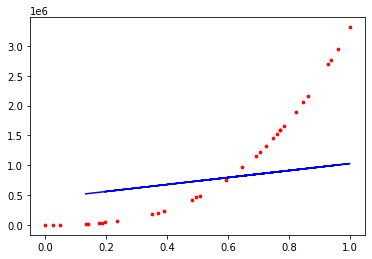

In [ ]:
#Plotting regresssion line
plt.scatter(x, y, color = "r", marker = ".", s = 30)
plt.plot(x_test, y_pred, color = "b")
plt.show()

In [ ]:
#Polynomial Regression with degree 2
#y = w0 + w1*x + w2*(x^2)

x=data['x']
y=data['y']

#deg=2
#lr=0.01
#itr=20
#m=32
#n=3

In [ ]:
# x square

data['x^2'] = np.square(x)
data.head()

#j = 0

#for j in range( deg + 1 ) :
#  if j != 0 :
#    x_pow = np.power( x, j )
#x_pow
#x_2=x**2
#x_2



,Unnamed: 0,x,y,x^2
0,0,34.33159,6.504940e+04,1178.658072
1,1,26.94935,3.238074e+04,726.267465
2,2,111.47824,2.061468e+06,12427.397993
3,3,51.18001,2.079118e+05,2619.393424
4,4,7.95172,1.083245e+03,63.229851


In [ ]:
# Initializing X and Y

X=data.drop(['Unnamed: 0','y'], axis=1)
Y=data['y']
X.head()

,x,x^2
0,34.33159,1178.658072
1,26.94935,726.267465
2,111.47824,12427.397993
3,51.18001,2619.393424
4,7.95172,63.229851


In [ ]:
# Normalizing data
X = (X - np.min(X))/(np.max(X)-np.min(X)).values
X.head()

,x,x^2
0,0.235200,0.067705
1,0.176675,0.041230
2,0.846802,0.726005
3,0.368770,0.152020
4,0.026066,0.002427


In [ ]:
#Test-Train split (60:40)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=0)

In [ ]:
class PolynomialRegressiondeg2() :

    def __init__( self, lr, itr ) :
        self.learning_rate = lr
        self.iterations = itr

    # Function for model training
    def fit( self, X, Y ) :
        samples, features = X.shape
        self.W = np.zeros(features)
        self.b = 0
        self.X = X.values
        self.Y = Y

        # gradient descent
        for i in range( self.iterations ) :
            Y_pred = np.dot(self.X, self.W) + self.b

            # calculate gradients
            dW = - (2*(self.X.T).dot(self.Y - Y_pred))/samples
            db = - 2 * np.sum( self.Y - Y_pred )/samples

            # update weights
            self.W = self.W - self.learning_rate * dW
            self.b = self.b - self.learning_rate * db

    def predict( self, X ):
        answer = X.dot(self.W)+self.b
        return answer


In [ ]:
# Implementing Polynomial Regression for degree 2

polreg2 = PolynomialRegressiondeg2( lr = 0.001,itr = 1000)
polreg2.fit( X_train, Y_train )

In [ ]:
# Predicting values on test data

Y_pred = polreg2.predict(X_test)
#y_pred1 = l_reg.predict(x_train)

print(Y_pred)
print(Y_test)

#print( "Predicted values ", np.round( y_pred.values[:10], 2 ) )
#print( "Real values      ", y_test[:10] )

11    9.966818e+05
22    1.298951e+06
10    7.619052e+05
2     1.147576e+06
16    9.087925e+05
14    9.575092e+05
28    1.116360e+06
26    1.268779e+06
20    1.354398e+06
13    4.960442e+05
24    1.024737e+06
5     1.039922e+06
17    4.527842e+05
dtype: float64
11    1.324300e+06
22    2.950622e+06
10    4.920425e+05
2     2.061468e+06
16    9.666553e+05
14    1.158231e+06
28    1.896502e+06
26    2.761793e+06
20    3.312369e+06
13    4.114939e+04
24    1.449739e+06
5     1.519872e+06
17    1.671358e+04
Name: y, dtype: float64


In [ ]:
# TO check the model

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rsquared=r2_score(Y_test,Y_pred)
print('r2 score: ', rsquared)
print('root mean square error: ',np.sqrt(mean_squared_error(Y_test,Y_pred)))

r2 score:  0.1475993859058069
root mean square error 930939.9873061723


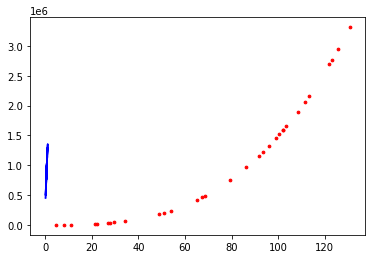

In [ ]:
#Plotting regresssion line
plt.scatter(x, y, color = "r", marker = ".", s = 30)
plt.plot(X_test, Y_pred, color = "b")
plt.show()

In [ ]:
#Polynomial Regression with degree 3
#y = w0 + w1*x + w2*(x^2) + w3*(x^3)


In [ ]:
# Cubing x

data['x^3'] = data['x']**3
data.head()

,Unnamed: 0,x,y,x^2,x^3
0,0,34.33159,6.504940e+04,1178.658072,4.046521e+04
1,1,26.94935,3.238074e+04,726.267465,1.957244e+04
2,2,111.47824,2.061468e+06,12427.397993,1.385384e+06
3,3,51.18001,2.079118e+05,2619.393424,1.340606e+05
4,4,7.95172,1.083245e+03,63.229851,5.027861e+02


In [ ]:
# Initializing P and Q

P=data.drop(['Unnamed: 0','y'], axis=1)
Q=data['y']
P.head()

,x,x^2,x^3
0,34.33159,1178.658072,4.046521e+04
1,26.94935,726.267465,1.957244e+04
2,111.47824,12427.397993,1.385384e+06
3,51.18001,2619.393424,1.340606e+05
4,7.95172,63.229851,5.027861e+02


In [ ]:
# Normalizing data
P = (P - np.min(P))/(np.max(P)-np.min(P)).values
P.head()

,x,x^2,x^3
0,0.235200,0.067705,0.018037
1,0.176675,0.041230,0.008701
2,0.846802,0.726005,0.619028
3,0.368770,0.152020,0.059861
4,0.026066,0.002427,0.000179


In [ ]:
# Train-test split(60:40)

from sklearn.model_selection import train_test_split
p_train,p_test,q_train,q_test=train_test_split(P,Q,test_size=0.4,random_state=0)

In [ ]:
class PolyRegressiondeg3() :

    def __init__( self, lr, itr ) :
        self.learning_rate = lr
        self.iterations = itr

    # Function for model training
    def fit( self, X, Y ) :
        samples, features = X.shape
        self.W = np.zeros(features)
        self.b = 0
        self.X = X.values
        self.Y = Y

        # gradient descent
        for i in range( self.iterations ) :
            Y_pred = np.dot(self.X, self.W) + self.b

            # calculate gradients
            dW = - (2*(self.X.T).dot(self.Y - Y_pred))/samples
            db = - 2 * np.sum( self.Y - Y_pred )/samples

            # update weights
            self.W = self.W - self.learning_rate * dW
            self.b = self.b - self.learning_rate * db

    def predict( self, X ):
        answer = X.dot(self.W)+self.b
        return answer


In [ ]:
#Implementing Polynomial regression for degree 3
polyreg3 = PolyRegressiondeg3( lr = 0.001,itr = 1000)
polyreg3.fit(p_train,q_train)

In [ ]:
Q_pred = polyreg3.predict(p_test)
#y_pred1 = l_reg.predict(x_train)

print(Q_pred)
print(q_test)

11    1.060285e+06
22    1.524800e+06
10    7.495501e+05
2     1.283482e+06
16    9.386156e+05
14    1.005282e+06
28    1.235859e+06
26    1.475349e+06
20    1.617390e+06
13    4.544387e+05
24    1.100433e+06
5     1.122422e+06
17    4.120046e+05
dtype: float64
11    1.324300e+06
22    2.950622e+06
10    4.920425e+05
2     2.061468e+06
16    9.666553e+05
14    1.158231e+06
28    1.896502e+06
26    2.761793e+06
20    3.312369e+06
13    4.114939e+04
24    1.449739e+06
5     1.519872e+06
17    1.671358e+04
Name: y, dtype: float64


In [ ]:
# TO check the model

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rsquared=r2_score(q_test,Q_pred)
print('r2 score: ', rsquared)
print('root mean square error: ',np.sqrt(mean_squared_error(q_test,Q_pred)))

r2 score:  0.3667536470826994
root mean square error:  802391.1997556869


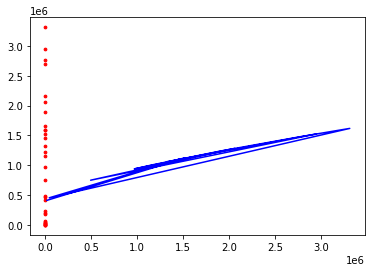

In [ ]:
#Plotting regresssion line
plt.scatter(x, y, color = "r", marker = ".", s = 30)
plt.plot(q_test, Q_pred, color = "b")
plt.show()